In [1]:
import os
import json
import warnings
import torch
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker

In [2]:
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches

In [4]:
# Set environment variables to help manage CUDA memory
# os.environ['CUDA_VISIBLE_DEVICES'] = "MIG-214cfb66-c8e5-57f2-b101-90f2cca83fad"

torch.cuda.empty_cache()
torch.set_float32_matmul_precision('medium')

if torch.cuda.is_available():
    print(torch.cuda.get_device_name(0))

NVIDIA A100 80GB PCIe MIG 7g.80gb


In [5]:
for root, dirs, files in os.walk('/home/serfani/serfani_data1/E3OMA2010D'):
    
    sorted_files = sorted(files)
    list1 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'aijh1E3oma']     # Surface Flux (time, lat, lon)
    list2 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'aijlh1E3oma']    # Forcings (time, level, lat, lon)
    list3 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'cijlh1E3oma']    # Precipitation 3D (time, level, lat, lon)
    list4 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'taijlh1E3oma']   # Aerosols Mixing Ratio (time, level, lat, lon)
    list5 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'tNDaijh1E3oma']  # Clay_emission, BCB_biomass_src, OCB_biomass_src (time, lat, lon)
    list6 = [os.path.join(root, file) for file in sorted_files if file.split(".")[1] == 'rijlh1E3oma']    # Cloud Fraction (time, level, lat, lon)

print(len(list1), len(list2), len(list3), len(list4), len(list5), len(list6))

1095 1095 1095 1095 1095 1095


In [5]:
ds4 = xr.open_mfdataset(list4[:30])
ds5 = xr.open_mfdataset(list5[:30])

warnings.filterwarnings("ignore", message="Converting a CFTimeIndex with dates from a non-standard calendar")
ds4['time'] = ds4.indexes['time'].to_datetimeindex(time_unit='us')
ds5['time'] = ds5.indexes['time'].to_datetimeindex(time_unit='us') 

ds5

<xarray.Dataset> Size: 299MB
Dimensions:          (time: 1440, lat: 90, lon: 144)
Coordinates:
  * lon              (lon) float32 576B -178.8 -176.2 -173.8 ... 176.2 178.8
  * lat              (lat) float32 360B -90.0 -87.0 -85.0 ... 85.0 87.0 90.0
  * time             (time) datetime64[us] 12kB 2010-01-01T00:15:00 ... 2010-...
Data variables:
    axyp             (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
    Clay_emission    (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
    BCB_biomass_src  (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
    OCB_biomass_src  (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
Attributes:
    xlabel:   E3oma_ai_2010d tests (test run)

## `prsurf, pblht_bp, shflx, lhflx`

### Planetary boundary layer
- The region of the atmosphere in which the surface influences temperature, moisture, and wind velocity through the turbulent transfer of mass. As a result of surface friction, winds in the planetary boundary layer are usually weaker than above and tend to blow toward areas of low pressure.
- Under clear, sunny skies over land, the planetary boundary layer tends to be relatively deep as a result of the heating of the ground by the Sun and the resultant generation of convective turbulence.
- during clear, calm nights, turbulence tends to cease, and radiational cooling (net loss of heat) from the surface results in an air temperature that increases with height above the surface.
- Cloud formation within the troposphere cloud formation cloud formationCloud formation at various heights. The region above the planetary boundary layer is commonly known as the free atmosphere. Winds at this volume are not directly retarded by surface friction

### Latent/Sensible Heat Flux
- For the climate system to be in a steady state, the long-term average energy coming in must balance the long-term energy going out. At the surface, the amount of energy absorbed through radiation has to balance that lost through the combined effects of radiation, latent heat, and sensible heat.
- About two-thirds of incoming solar energy is absorbed by the surface, while the rest is absorbed by the atmosphere.
- Radiative transfer isn't the only way that energy moves between the surface and the atmosphere. The surface also loses energy through evapotranspiration from plants and wet surfaces (latent heat), and through conduction (sensible heat).
- Clouds reflect, absorb, and radiate energy.
- Vegetation strongly modulates energy flow by affecting albedo and evapotranspiration. (ours is prescribed emission, so this might not be that much important for the time being.)

In [6]:
ds1 = xr.open_mfdataset(list1[:30])

warnings.filterwarnings("ignore", message="Converting a CFTimeIndex with dates from a non-standard calendar")
ds1['time'] = ds1.indexes['time'].to_datetimeindex(time_unit='us')  # 365 x 48 -> 17520

ds1

<xarray.Dataset> Size: 373MB
Dimensions:   (time: 1440, lat: 90, lon: 144)
Coordinates:
  * lon       (lon) float32 576B -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
  * lat       (lat) float32 360B -90.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 90.0
  * time      (time) datetime64[us] 12kB 2010-01-01T00:15:00 ... 2010-01-30T2...
Data variables:
    axyp      (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
    prsurf    (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
    pblht_bp  (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
    shflx     (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
    lhflx     (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
Attributes:
    xlabel:   E3oma_ai_2010d tests (test run)

In [ ]:
weights = np.cos(np.deg2rad(ds1.lat))
weights.name = "weights"

ds1_avg = ds1.weighted(weights).mean(dim=("lat", "lon"))
ds4_avg = ds4.weighted(weights).mean(dim=("lat", "lon"))
ds5_avg = ds5.weighted(weights).mean(dim=("lat", "lon"))

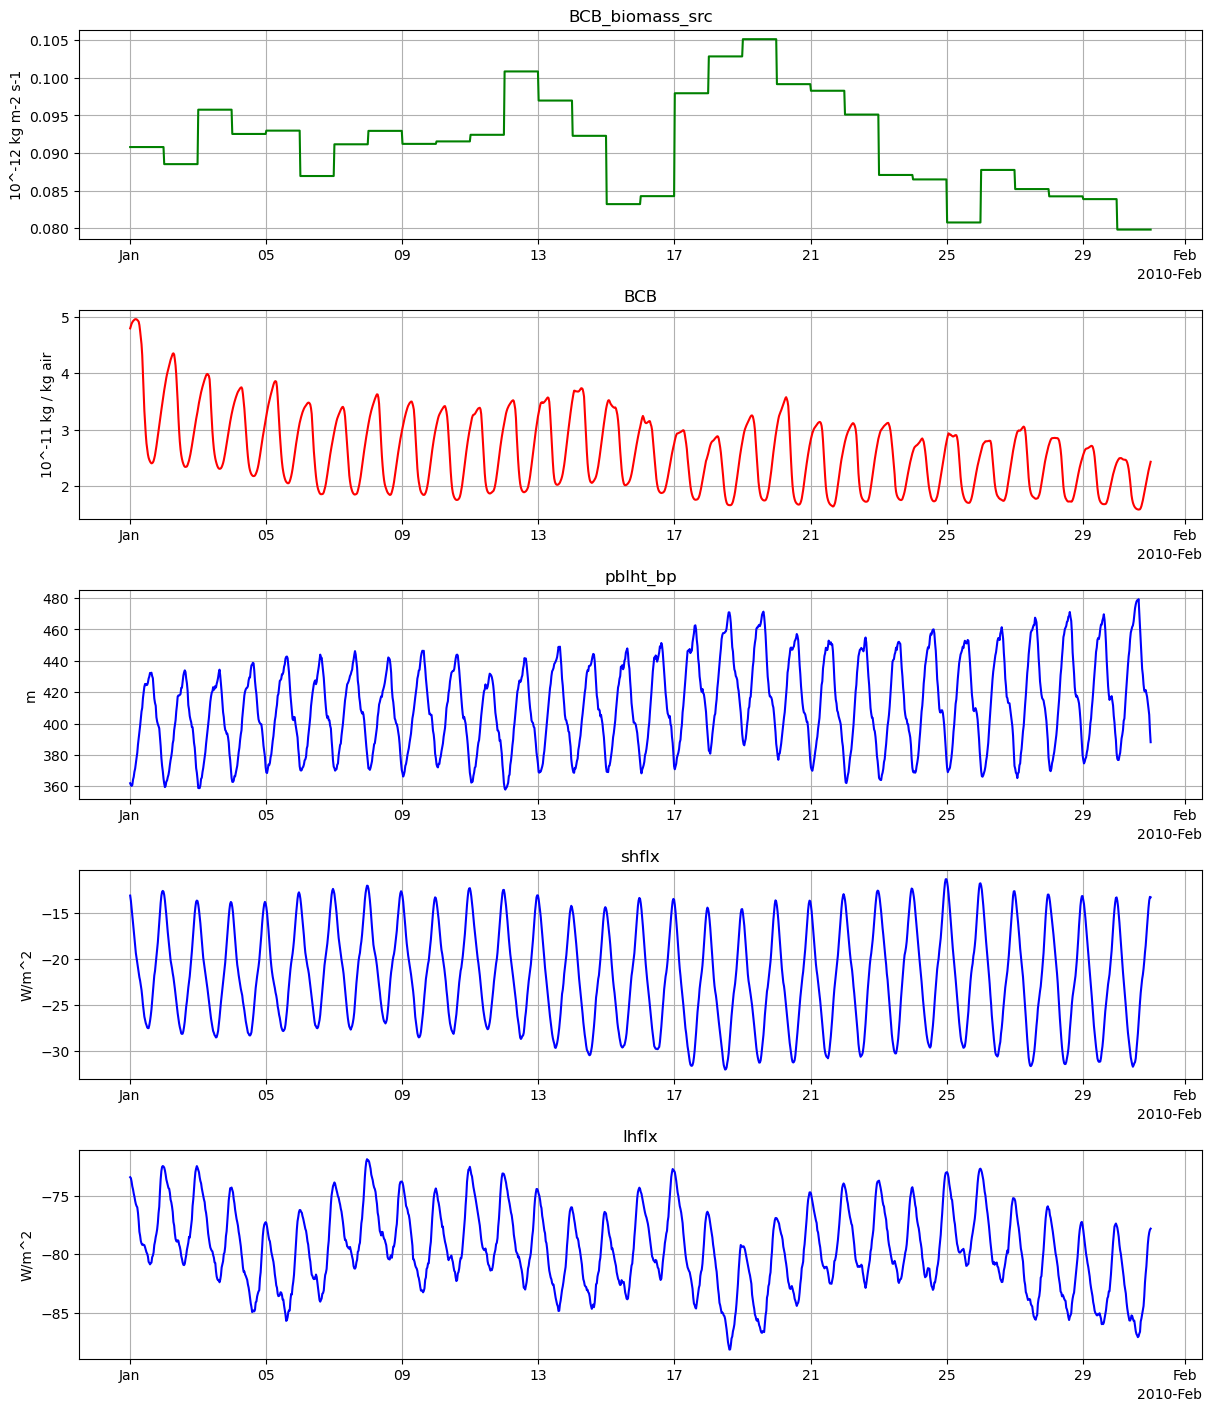

In [41]:
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(12, 14), constrained_layout=True)

var1 = ["pblht_bp", "shflx", "lhflx"]
unit1 = ['m', 'W/m^2', 'W/m^2']

for idx, ax in enumerate(axs.flat):
    if idx == 0:
        ds5_avg['BCB_biomass_src'].plot(ax=ax, label='BCB_biomass_src', color='g')
        
        # Set titles and labels
        ax.set_title(f'BCB_biomass_src')
        ax.set_xlabel('')
        ax.set_ylabel('10^-12 kg m-2 s-1')
        ax.grid()
    elif idx == 1:
        ds4_avg['BCB'].isel(level=0).plot(ax=ax, label='BCB Mixing Ratio', color='r')

        # Set titles and labels
        ax.set_title(f'BCB')
        ax.set_xlabel('')
        ax.set_ylabel('10^-11 kg / kg air')
        ax.grid()

    elif idx <= len(var1) + 1:  # Changed condition and used elif
        var_idx = idx - 2  # Adjust index for var1 and unit1 arrays
        
        # Plot the time series
        ds1_avg[var1[var_idx]].plot(ax=ax, label=var1[var_idx], color='b')
        
        # Set titles and labels
        ax.set_title(var1[var_idx])
        ax.set_xlabel('')
        ax.set_ylabel(unit1[var_idx])
        ax.grid()
    else:
        # Turn off unused subplots
        ax.set_visible(False)

# Show the plot
plt.show()

In [44]:
df1 = ds1[['pblht_bp', 'shflx', 'lhflx']].to_dataframe(dim_order=['lat', 'lon', 'time']).reset_index()
df4 = ds4[['BCB']].isel(level=0, drop=True).to_dataframe(dim_order=['lat', 'lon', 'time']).reset_index()
df5 = ds5[["BCB_biomass_src"]].to_dataframe(dim_order=['lat', 'lon', 'time']).reset_index()

In [46]:
join_keys = ['lat', 'lon', 'time']
df = df1.merge(df5, on=join_keys, how='inner')\
    .merge(df4, on=join_keys, how='inner')

df.head()

,lat,lon,time,pblht_bp,shflx,lhflx,BCB_biomass_src,BCB
0,-90.0,-178.75,2010-01-01 00:15:00,103.486305,1.646881,0.196569,0.0,0.000743
1,-90.0,-178.75,2010-01-01 00:45:00,173.312790,1.227287,0.202988,0.0,0.000743
2,-90.0,-178.75,2010-01-01 01:15:00,173.330139,1.627878,0.231558,0.0,0.000743
3,-90.0,-178.75,2010-01-01 01:45:00,173.288483,1.212380,0.235234,0.0,0.000743
4,-90.0,-178.75,2010-01-01 02:15:00,173.304962,1.598848,0.236751,0.0,0.000743


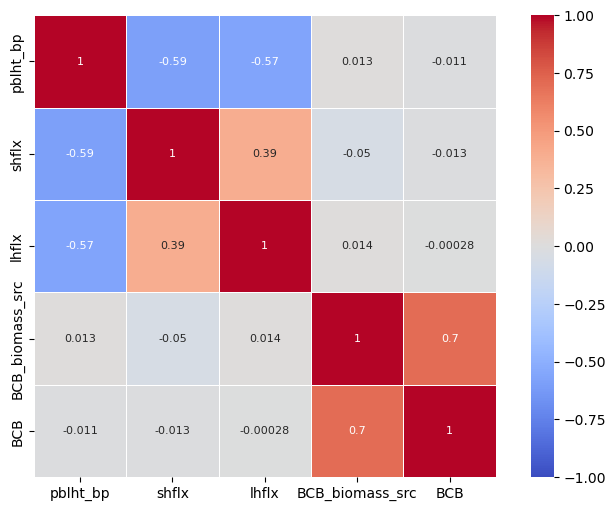

In [51]:
import seaborn as sns

# correlation matrix
corr_mat = df.drop(columns=['lat', 'lon', 'time']).corr() # 'z', 'airmass', 'p_3d', 't'
fig, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(corr_mat, square=True, annot=True, linewidths=.5, 
                 annot_kws={"size": 8}, cmap='coolwarm', center=0, 
                 vmin=-1, vmax=1)
plt.show()

### 3D Forcings

In [53]:
ds2 = xr.open_mfdataset(list2[:30])

warnings.filterwarnings("ignore", message="Converting a CFTimeIndex with dates from a non-standard calendar")
ds2['time'] = ds2.indexes['time'].to_datetimeindex(time_unit='us')

ds2

<xarray.Dataset> Size: 37GB
Dimensions:  (time: 1440, lat: 90, lon: 144, level: 62)
Coordinates:
  * lon      (lon) float32 576B -178.8 -176.2 -173.8 ... 173.8 176.2 178.8
  * lat      (lat) float32 360B -90.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 90.0
  * level    (level) float32 248B 1.0 2.0 3.0 4.0 5.0 ... 59.0 60.0 61.0 62.0
  * time     (time) datetime64[us] 12kB 2010-01-01T00:15:00 ... 2010-01-30T23...
Data variables:
    axyp     (time, lat, lon) float32 75MB dask.array<chunksize=(48, 90, 144), meta=np.ndarray>
    u        (time, level, lat, lon) float32 5GB dask.array<chunksize=(48, 62, 90, 144), meta=np.ndarray>
    v        (time, level, lat, lon) float32 5GB dask.array<chunksize=(48, 62, 90, 144), meta=np.ndarray>
    omega    (time, level, lat, lon) float32 5GB dask.array<chunksize=(48, 62, 90, 144), meta=np.ndarray>
    p_3d     (time, level, lat, lon) float32 5GB dask.array<chunksize=(48, 62, 90, 144), meta=np.ndarray>
    z        (time, level, lat, lon) float32 5GB dask.array<chunksize=(48, 62, 90, 144), meta=np.ndarray>
    t        (time, level, lat, lon) float32 5GB dask.array<chunksize=(48, 62, 90, 144), meta=np.ndarray>
    th       (time, level, lat, lon) float32 5GB dask.array<chunksize=(48, 62, 90, 144), meta=np.ndarray>
    q        (time, level, lat, lon) float32 5GB dask.array<chunksize=(48, 62, 90, 144), meta=np.ndarray>
Attributes:
    xlabel:   E3oma_ai_2010d tests (test run)

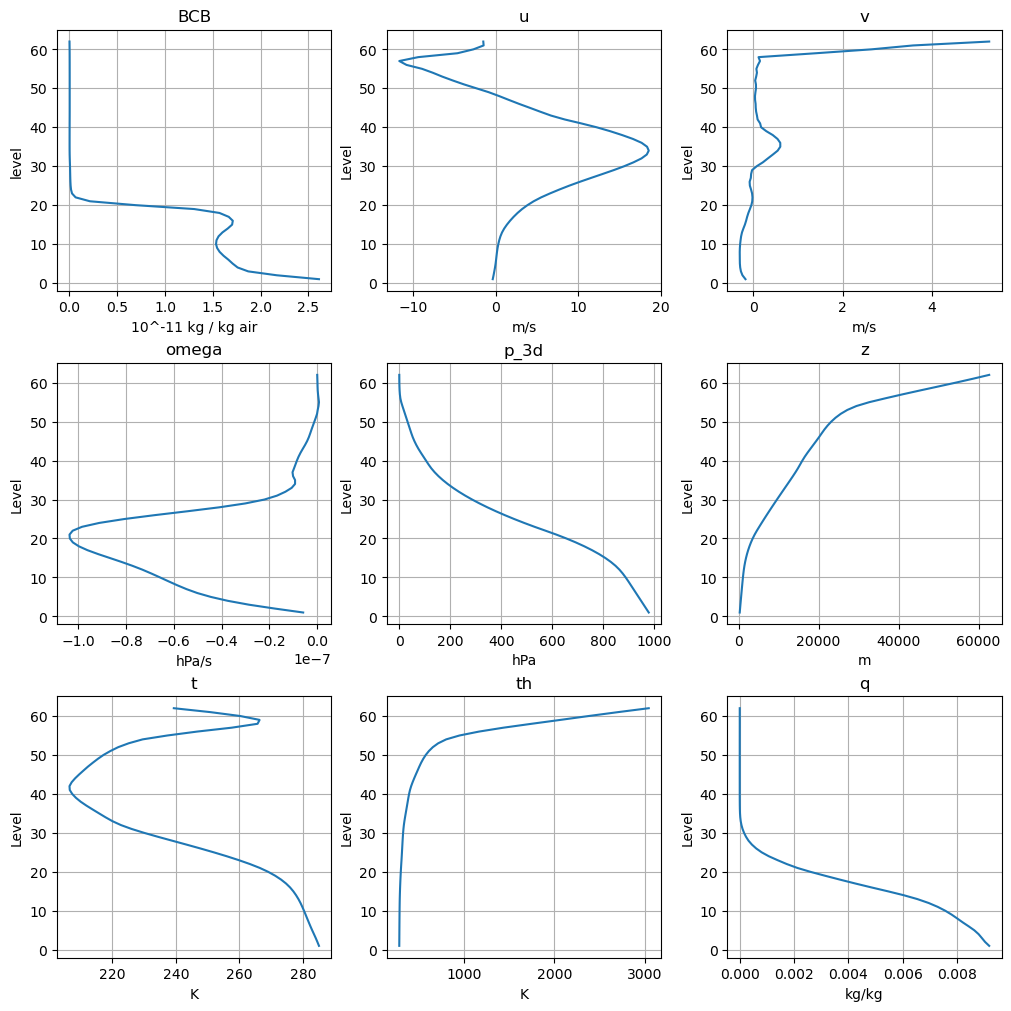

In [57]:
ds2_avg = ds2.weighted(weights).mean(dim=("lat", "lon", "time"))
ds4_avg = ds4.weighted(weights).mean(dim=("lat", "lon", "time"))

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(10, 10), constrained_layout=True)

var2 = ["u", "v", "omega", "p_3d", "z", "t", "th", "q"]
unit2 = ['m/s', 'm/s', 'hPa/s', 'hPa', 'm', 'K', 'K', 'kg/kg']

for idx, ax in enumerate(axs.flat):
    if idx == 0:
        ds4_avg['BCB'].plot(ax=ax, y='level', yincrease=True)

        # Set titles and labels
        ax.set_title('BCB')
        ax.set_xlabel('10^-11 kg / kg air')
        ax.set_ylabel('level')
        ax.grid()
    elif idx <= len(var2):  # Changed to elif and ensure we don't exceed the number of variables
        
        # Plot the time series
        ds2_avg[var2[idx-1]].plot(ax=ax, y='level', yincrease=True)
        
        # Set titles and labels
        ax.set_title(var2[idx-1])
        ax.set_xlabel(unit2[idx-1])
        ax.set_ylabel('Level')
        ax.grid()
    else:
        # Turn off unused subplots
        ax.set_visible(False)

plt.show()

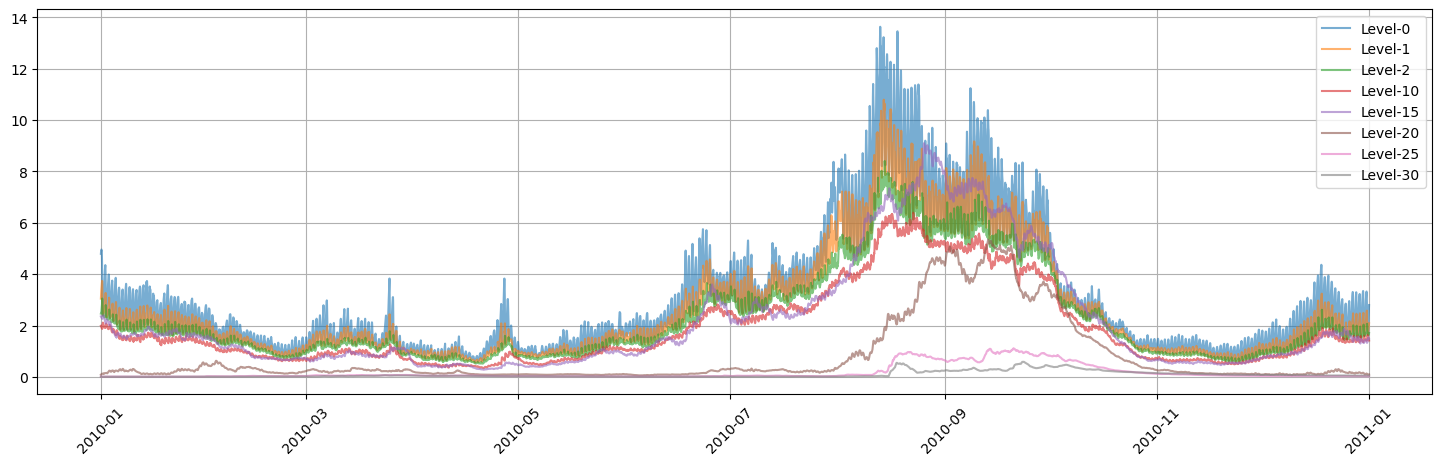

In [38]:
ds4_avg = ds4.weighted(weights).mean(dim=("lat", "lon"))

fig, ax = plt.subplots(1, 1, figsize=(18, 5))

ax.plot(ds4_avg.indexes['time'], ds4_avg['BCB'].isel(level=0), alpha=0.6, label='Level-0')
ax.plot(ds4_avg.indexes['time'], ds4_avg['BCB'].isel(level=1), alpha=0.6, label='Level-1')
ax.plot(ds4_avg.indexes['time'], ds4_avg['BCB'].isel(level=2), alpha=0.6, label='Level-2')
ax.plot(ds4_avg.indexes['time'], ds4_avg['BCB'].isel(level=10), alpha=0.6, label='Level-10')
ax.plot(ds4_avg.indexes['time'], ds4_avg['BCB'].isel(level=15), alpha=0.6, label='Level-15')
ax.plot(ds4_avg.indexes['time'], ds4_avg['BCB'].isel(level=20), alpha=0.6, label='Level-20')
ax.plot(ds4_avg.indexes['time'], ds4_avg['BCB'].isel(level=25), alpha=0.6, label='Level-25')
ax.plot(ds4_avg.indexes['time'], ds4_avg['BCB'].isel(level=30), alpha=0.6, label='Level-30')

ax.tick_params(axis='x', labelrotation=45)
ax.grid()

plt.legend()
plt.show()

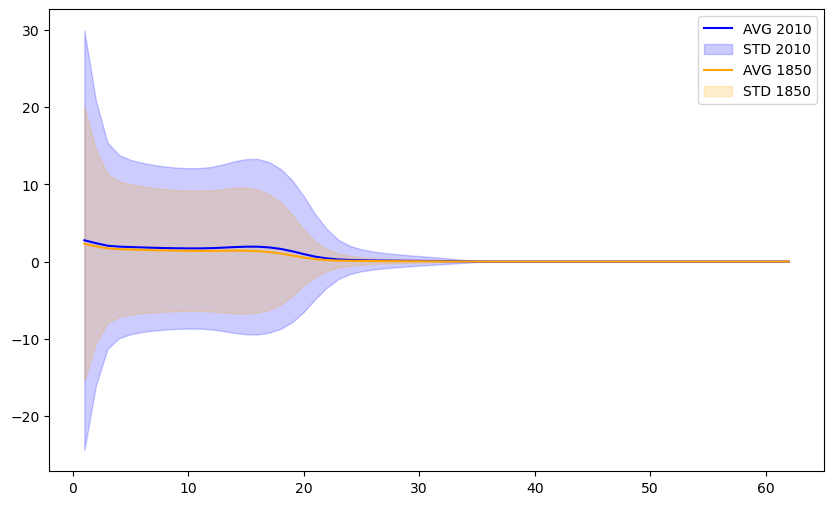

In [7]:
# Load the JSON data
with open('../statistics/2010.json', 'r') as jf:
    data_2010 = json.load(jf)

    avg_2010 = np.array(data_2010['BCB']['avg'])
    std_2010 = np.array(data_2010['BCB']['std'])

with open('../statistics/1850.json', 'r') as jf:
    data_1850 = json.load(jf)

    avg_1850 = np.array(data_1850['BCB']['avg'])
    std_1850 = np.array(data_1850['BCB']['std'])

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(ds4.level, avg_2010, label='AVG 2010', color='blue')
ax.fill_between(ds4.level, avg_2010 - std_2010, avg_2010 + std_2010, color='blue', alpha=0.2, label='STD 2010')

ax.plot(ds4.level, avg_1850, label='AVG 1850', color='orange')
ax.fill_between(ds4.level, avg_1850 - std_1850, avg_1850 + std_1850, color='orange', alpha=0.2, label='STD 1850')

plt.legend()
plt.show()

Variables to plot: ['u', 'v', 'omega', 'p_3d', 'z', 't', 'th', 'q', 'prec_3d_sum', 'mcuflx', 'cfrad', 'airmass', 'BCB']


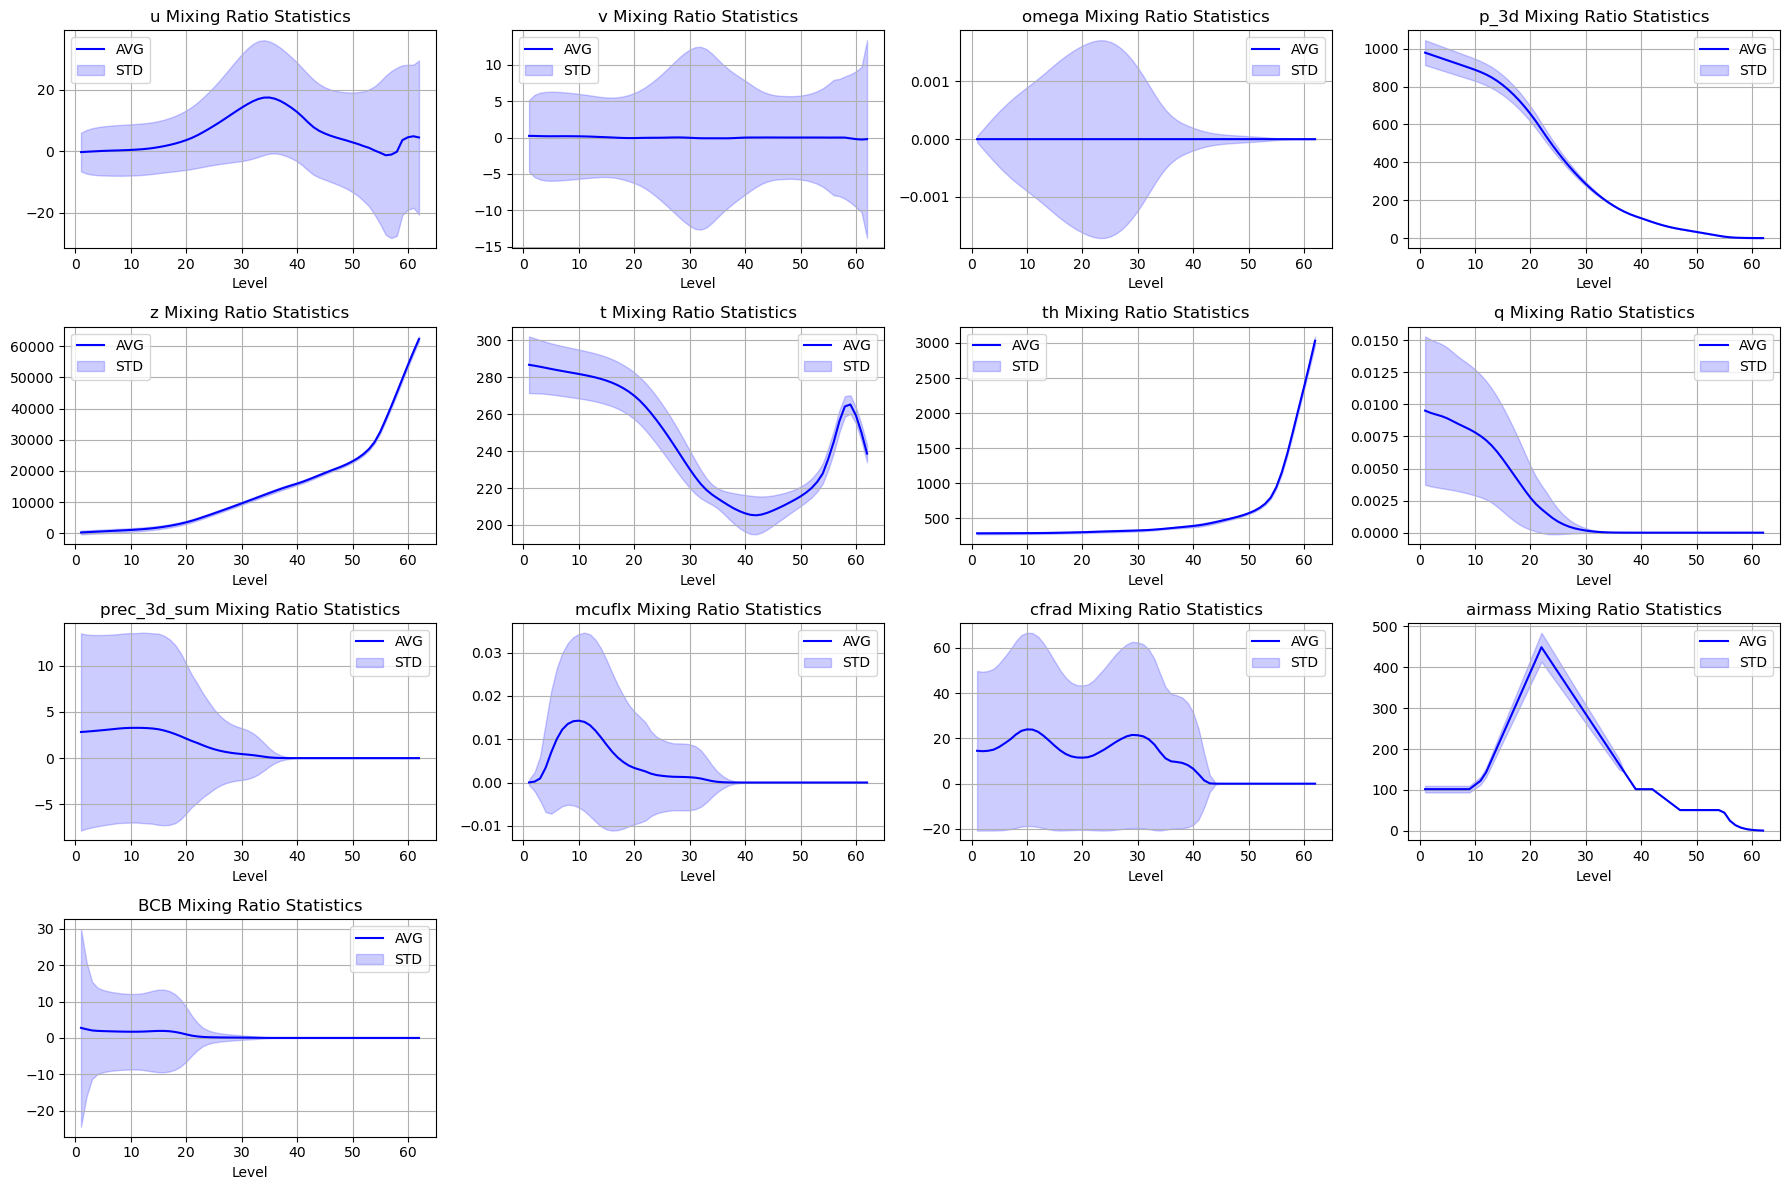

In [24]:


# Load the JSON data
with open('../statistics/2010.json', 'r') as jf:
    data = json.load(jf)

# Filter variables that have more than one data point
valid_variables = []
for var_name in data.keys():
    avg = np.array(data[var_name]['avg'])
    std = np.array(data[var_name]['std'])
    
    # Check if both avg and std have more than one element
    if avg.ndim > 0 and std.ndim > 0:
        valid_variables.append(var_name)

print(f"Variables to plot: {valid_variables}")

# Only proceed if we have valid variables to plot
if valid_variables:
    # Calculate number of subplots needed
    n_vars = len(valid_variables)
    n_cols = 4  # You can adjust this based on your preference
    n_rows = (n_vars + n_cols - 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 3*n_rows))

    # Flatten axes array for easier indexing if we have multiple rows
    if n_rows > 1:
        axes = axes.flatten()
    elif n_cols == 1:
        axes = [axes]
    elif n_vars == 1:
        axes = [axes]

    # Plot each valid variable
    for i, var_name in enumerate(valid_variables):
        avg = np.array(data[var_name]['avg'])
        std = np.array(data[var_name]['std'])
        
        ax = axes[i]
        ax.plot(ds4.level, avg, label='AVG', color='blue')
        ax.fill_between(ds4.level, avg - std, avg + std, color='blue', alpha=0.2, label='STD')
        ax.set_title(f'{var_name} Mixing Ratio Statistics')
        ax.set_xlabel('Level')

        ax.legend()
        ax.grid()

    # Hide any unused subplots
    for i in range(n_vars, len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No valid variables found to plot.")

###

In [10]:
# Your preprocessing
# data = (ds4['BCB'].values - avg_1850.reshape(1, -1, 1, 1)) / std_1850.reshape(1, -1, 1, 1)
data = (ds4['BCB'].values - avg_1850[0]) / std_1850[0]

# Reshape data to have levels as columns for boxplot
data_reshaped = data.transpose(0, 2, 3, 1).reshape(-1, 62)

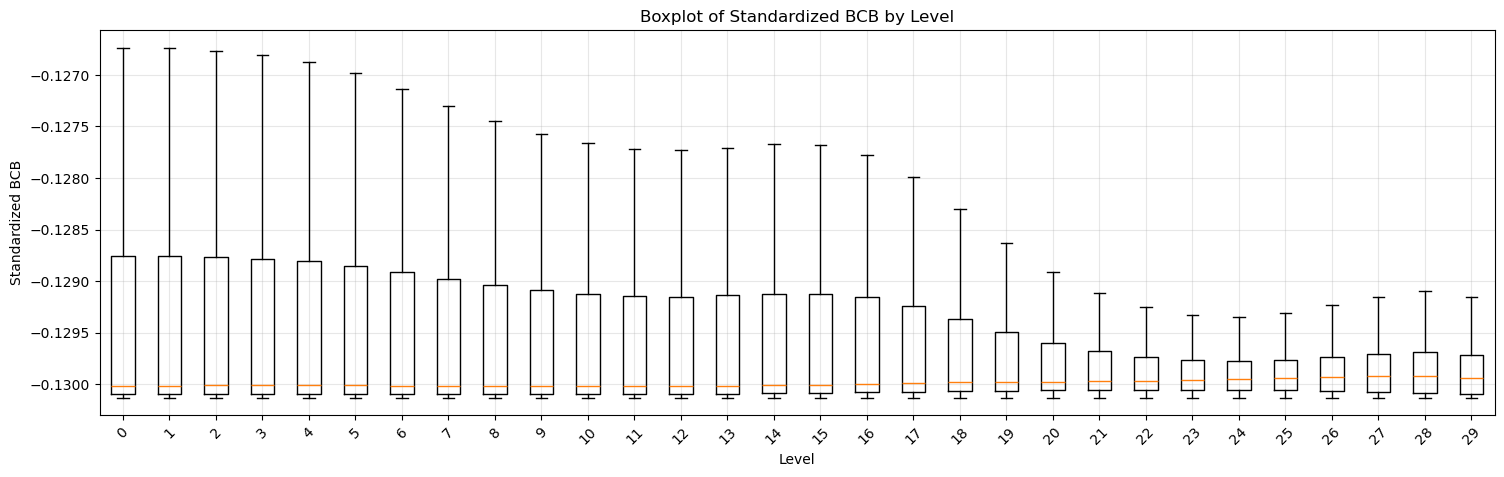

In [11]:
# Create boxplot
fig, ax = plt.subplots(figsize=(18, 5))

box_plot = ax.boxplot(data_reshaped[:, :30], tick_labels=range(30), showfliers=False)
ax.set_xlabel('Level')
ax.set_ylabel('Standardized BCB')
ax.set_title('Boxplot of Standardized BCB by Level')
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.show()

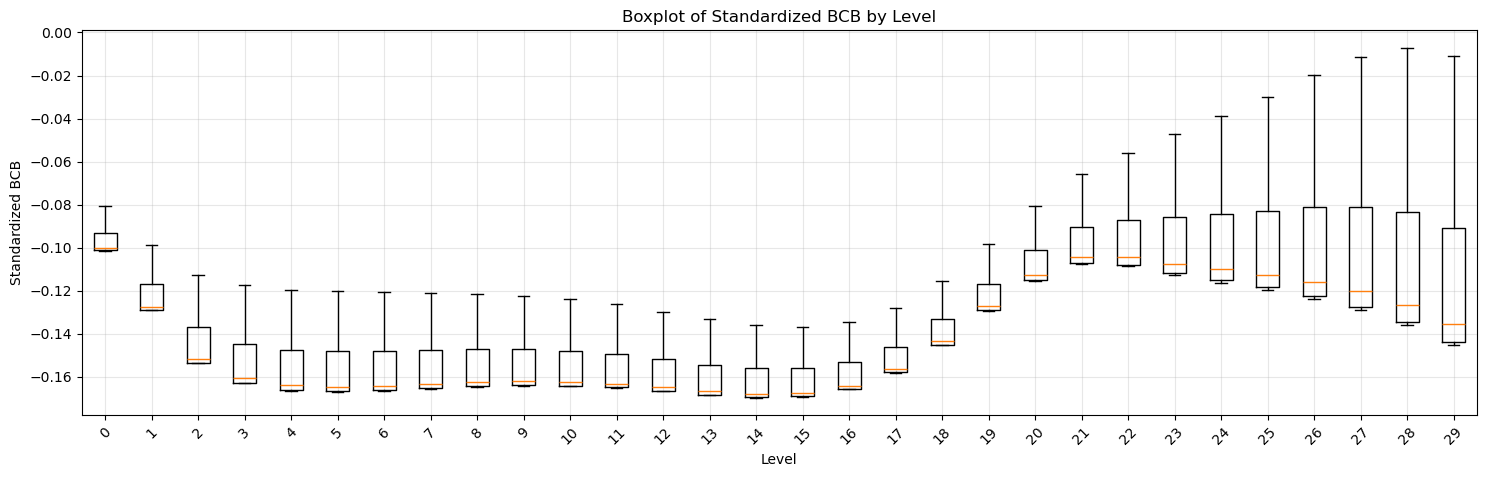

In [45]:
# Create boxplot
fig, ax = plt.subplots(figsize=(18, 5))

box_plot = ax.boxplot(data_reshaped[:, :30], tick_labels=range(30), showfliers=False)
ax.set_xlabel('Level')
ax.set_ylabel('Standardized BCB')
ax.set_title('Boxplot of Standardized BCB by Level')
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.show()

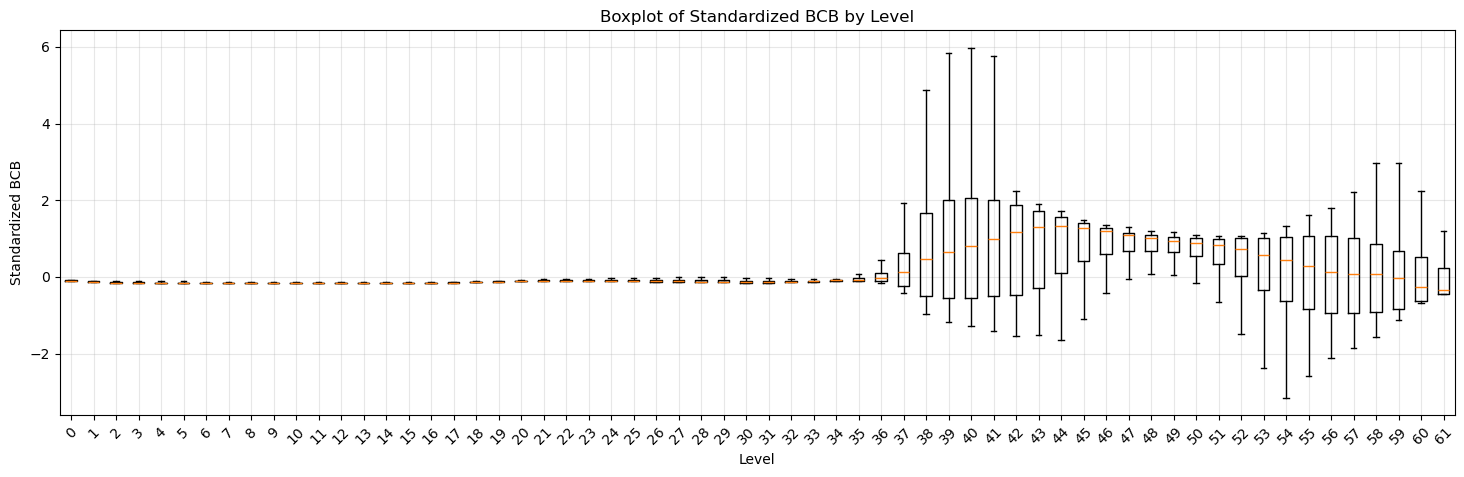

In [ ]:
# Create boxplot
fig, ax = plt.subplots(figsize=(18, 5))

box_plot = ax.boxplot(data_reshaped, tick_labels=range(62), showfliers=False)
ax.set_xlabel('Level')
ax.set_ylabel('Standardized BCB')
ax.set_title('Boxplot of Standardized BCB by Level')
ax.grid(True, alpha=0.3)

plt.xticks(rotation=45)
plt.show()

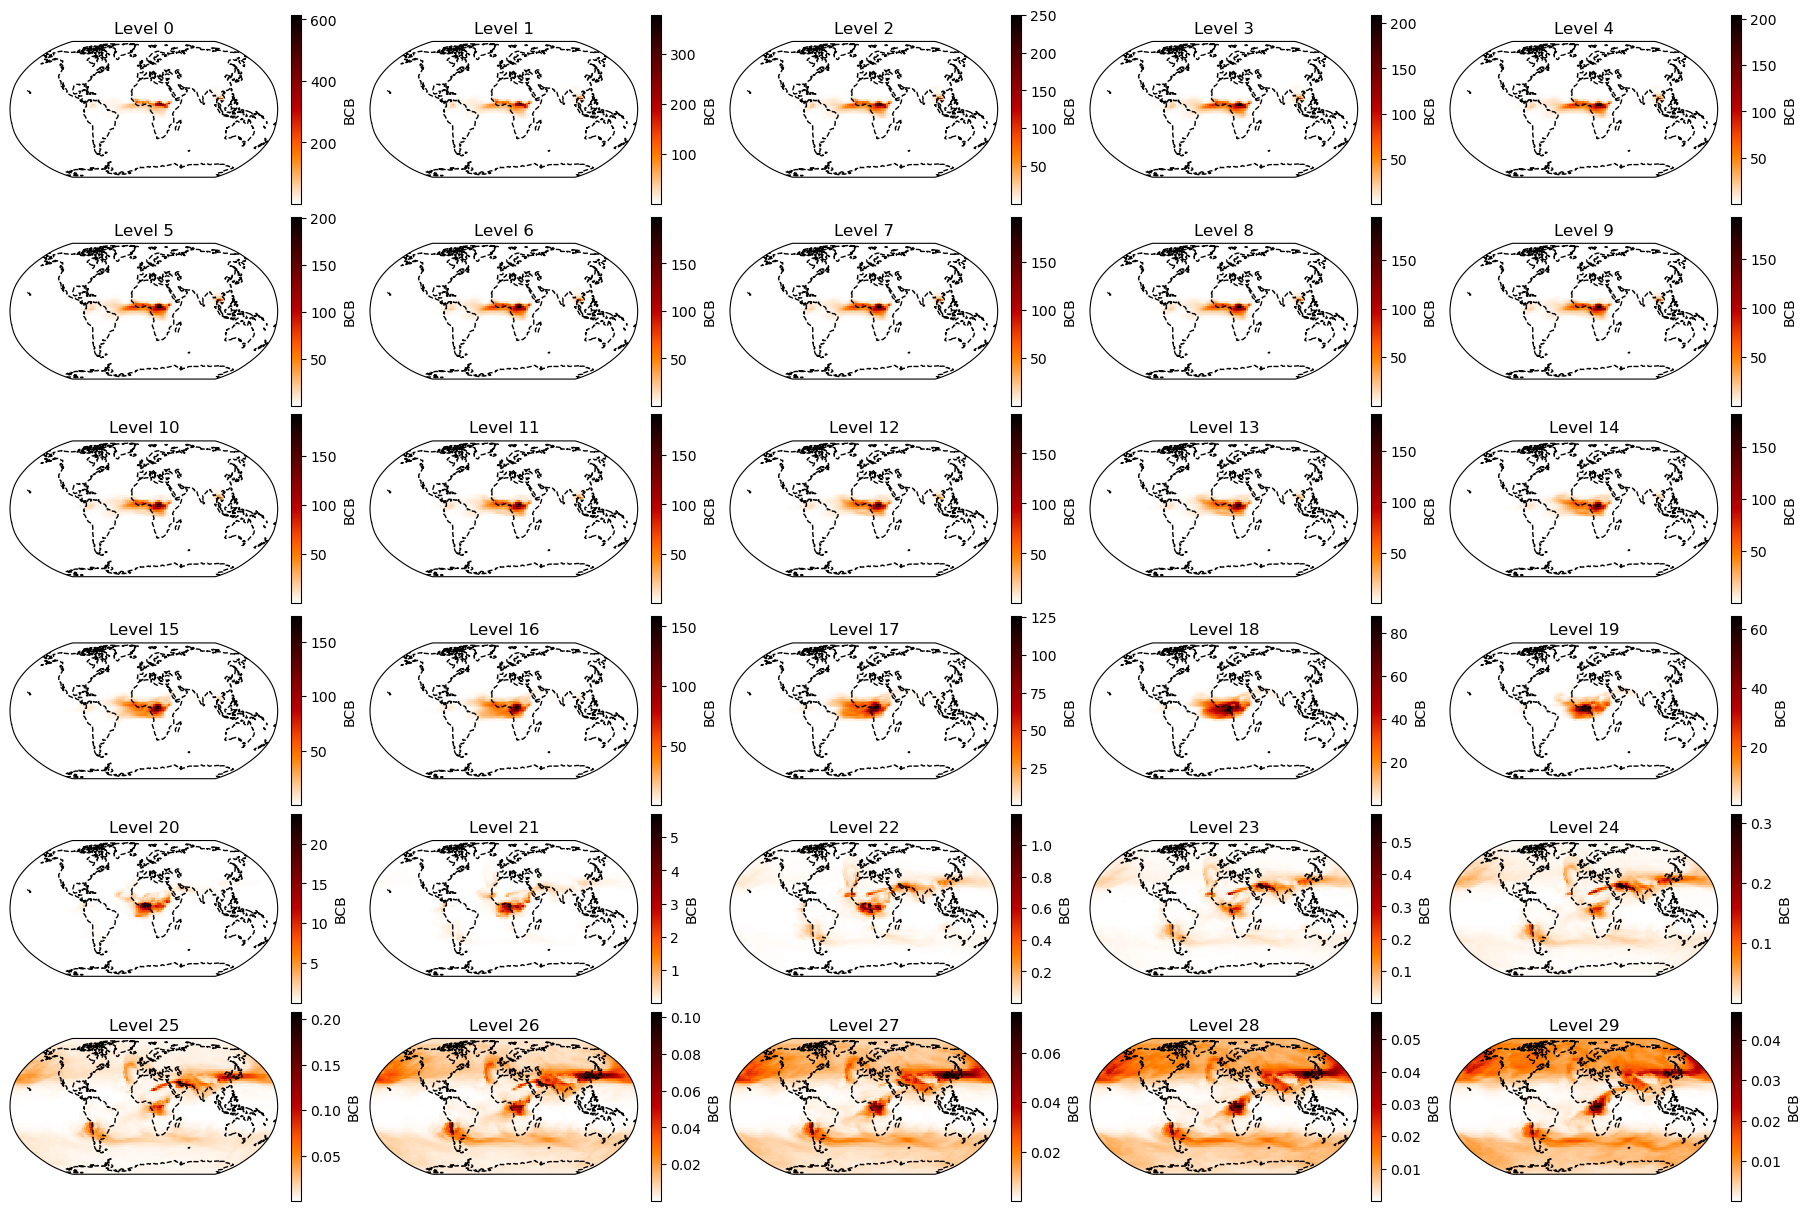

In [33]:
ds4_avg = ds4['BCB'].weighted(weights).mean(dim=("time")).compute()

fig, axs = plt.subplots(ncols=5, nrows=6, figsize=(18, 12), constrained_layout=True, subplot_kw={'projection': ccrs.Robinson()})

for idx, ax in enumerate(axs.flat):
    # Plot the data
    ds4_avg.isel(level=idx).plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=True, cmap='gist_heat_r')

    # Add coastlines and borders
    ax.add_feature(cfeature.COASTLINE, linestyle='--')
    ax.set_title(f'Level {idx}')

# Show the plot
plt.show()

In [61]:
ds2 = xr.open_mfdataset(list2[:365], engine='netcdf4', chunks={'time': 48, 'lat': 90, 'lon': 144, 'level': 62}) #.sel(lat=slice(5, 8), lon=slice(10, 30))
ds3 = xr.open_mfdataset(list3[:365], engine='netcdf4', chunks={'time': 48, 'lat': 90, 'lon': 144, 'level': 62}) #.sel(lat=slice(5, 8), lon=slice(10, 30))
ds4 = xr.open_mfdataset(list4[:365], engine='netcdf4', chunks={'time': 48, 'lat': 90, 'lon': 144, 'level': 62}) #.sel(lat=slice(5, 8), lon=slice(10, 30))
ds6 = xr.open_mfdataset(list6[:365], engine='netcdf4', chunks={'time': 48, 'lat': 90, 'lon': 144, 'level': 62}) #.sel(lat=slice(5, 8), lon=slice(10, 30))

In [44]:
high_bcb_coords = [
    (0, 20),     # Central Africa (Congo Basin)
    (-10, 25),   # Southern DRC / Zambia
    (-15, 35),   # Mozambique / Malawi
    (5, 10),     # Nigeria / Cameroon
    (-10, -65),  # Northern Bolivia / Southwestern Brazil
    (-20, -55),  # Central Paraguay / Southern Brazil
    (-5, -70),   # Western Amazon, Peru/Brazil border
    (0, 110),    # Borneo
    (15, 105),   # Cambodia / Southern Vietnam
    (5, 100),    # Southern Thailand / Malaysia Peninsula
    (-13, 135),  # Northern Australia
    (35, -90),  # Central Mexico
    (60, -110),  # Canadian Prairie Provinces
    (55, 80),    # Western Siberia
    (63, 160),  
]

# Extract latitudes and longitudes
lats, lons = zip(*high_bcb_coords)

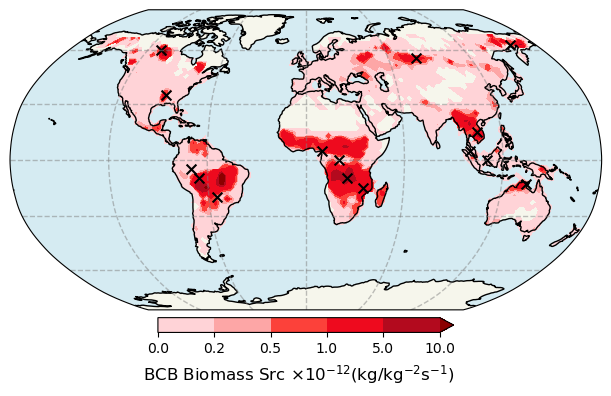

In [45]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6, 4), subplot_kw={'projection': ccrs.Robinson()}, constrained_layout=True)

# Create a meshgrid for longitude and latitude
lon, lat = np.meshgrid(ds5['lon'], ds5['lat'])

data = ds5['BCB_biomass_src'].mean(dim='time')
data = np.where(data <= 0.0, np.nan, data)

colors = [(0.0, 'mistyrose'), (0.025, 'pink'), (0.05, 'salmon'), (0.1, 'red'), (0.5, 'crimson'), (1.0, 'darkred')]
cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors, N=256)

im = ax.contourf(
    lon, lat, data,
    transform=ccrs.PlateCarree(),
    levels=[0, 0.25, 0.5, 1.0, 5.0, 10], 
    cmap=cmap, extend='max'
)

ax.scatter(lons, lats, color='k', marker='x', s=50, transform=ccrs.PlateCarree())

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linewidth=1, color='gray', alpha=0.5, linestyle='--')

ax.set_global()
ax.add_feature(cfeature.LAND, alpha=0.5)
ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.5)
ax.add_feature(cfeature.COASTLINE)

# Add an individual colorbar for each subplot
cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.02, shrink=0.5)
cbar.set_label(r'BCB Biomass Src $ \times 10^{-12} (\mathrm{kg} / \mathrm{kg}^{-2} \mathrm{s}^{-1}$)', rotation=0, labelpad=5, fontsize=12)
cbar.ax.tick_params(labelsize=10)  # Adjust the font size here
cbar.ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%.1f'))

plt.show()

In [62]:
ds2 = ds2.sel(lat=np.array(lats), lon=np.array(lons), method="nearest")
ds3 = ds3.sel(lat=np.array(lats), lon=np.array(lons), method="nearest")
ds4 = ds4.sel(lat=np.array(lats), lon=np.array(lons), method="nearest")
ds6 = ds6.sel(lat=np.array(lats), lon=np.array(lons), method="nearest")

In [63]:
df2 = ds2[["u", "v", "omega", "p_3d", "t", "th", "q"]].to_dataframe(dim_order=['lat', 'lon', 'time', 'level']).reset_index()
df3 = ds3[["prec_3d_sum", "mcuflx"]].to_dataframe(dim_order=['lat', 'lon', 'time', 'level']).reset_index()
df4 = ds4[["BCB"]].to_dataframe(dim_order=['lat', 'lon', 'time', 'level']).reset_index()
df6 = ds6[["cfrad"]].to_dataframe(dim_order=['lat', 'lon', 'time', 'level']).reset_index()

In [64]:
join_keys = ['lat', 'lon', 'time', 'level']
df = df2.merge(df3, on=join_keys, how='inner')\
        .merge(df4, on=join_keys, how='inner')\
        .merge(df6, on=join_keys, how='inner')

In [67]:
df.head()

,lat,lon,time,level,u,v,omega,p_3d,t,th,q,prec_3d_sum,mcuflx,BCB,cfrad
0,1.0,21.25,2010-01-01 00:15:00,1.0,1.733638,1.698633,-0.000061,958.262268,300.482208,304.171387,0.017383,0.237177,0.0,25.455711,0.0
1,1.0,21.25,2010-01-01 00:15:00,1.0,1.733638,1.698633,-0.000061,958.262268,300.482208,304.171387,0.017383,0.237177,0.0,25.455711,0.0
2,1.0,21.25,2010-01-01 00:15:00,1.0,1.733638,1.698633,-0.000061,958.262268,300.482208,304.171387,0.017383,0.237177,0.0,25.455711,0.0
3,1.0,21.25,2010-01-01 00:15:00,1.0,1.733638,1.698633,-0.000061,958.262268,300.482208,304.171387,0.017383,0.237177,0.0,25.455711,0.0
4,1.0,21.25,2010-01-01 00:15:00,1.0,1.733638,1.698633,-0.000061,958.262268,300.482208,304.171387,0.017383,0.237177,0.0,25.455711,0.0


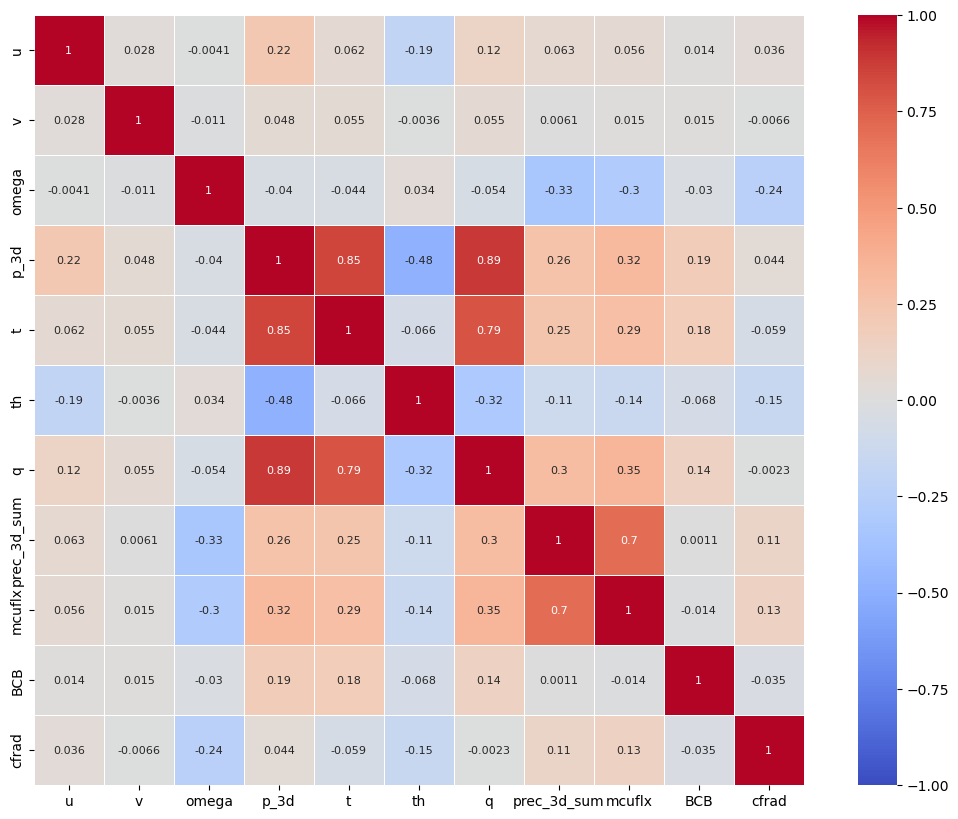

In [65]:
import seaborn as sns

# correlation matrix
corr_mat = df.drop(columns=['lat', 'lon', 'time', 'level']).corr() # airmass, z dropped!
fig, ax = plt.subplots(figsize=(14, 10))
ax = sns.heatmap(corr_mat, square=True, annot=True, linewidths=.5, 
                 annot_kws={"size": 8}, cmap='coolwarm', center=0, 
                 vmin=-1, vmax=1)
plt.show()

In [58]:
sampled = df.sample(n=10000, random_state=42)
X = sampled.drop(columns=['lat', 'lon', 'time', 'level', 'BCB'])
y = sampled["BCB"]

In [59]:
from sklearn.feature_selection import mutual_info_regression, f_regression
mi = mutual_info_regression(X, y)
f_test, _ = f_regression(X, y)

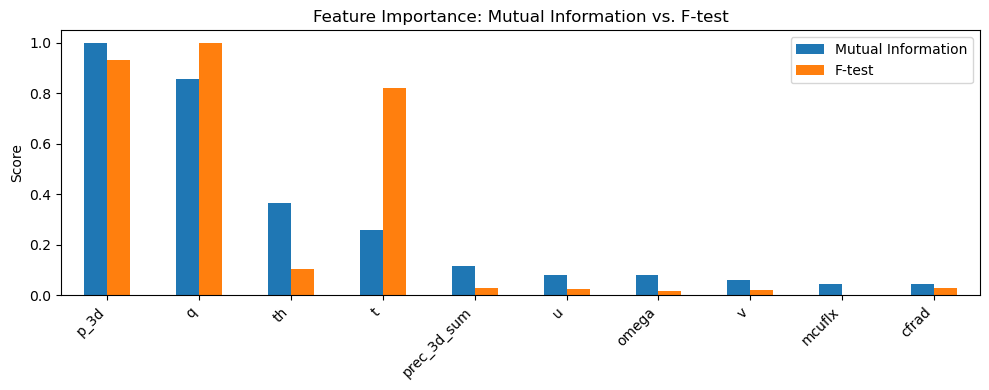

In [60]:
# Combine both series into a DataFrame
feature_scores = pd.DataFrame({
    "Mutual Information": mi / np.max(mi),
    "F-test": f_test / np.max(f_test)
}, index=X.columns)

# Sort by one of the scores (e.g., Mutual Information)
feature_scores = feature_scores.sort_values("Mutual Information", ascending=False)

# Plot as grouped bars
feature_scores.plot(kind='bar', figsize=(10, 4))

plt.title("Feature Importance: Mutual Information vs. F-test")
plt.ylabel("Score")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()